In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive/My Drive/yolopost'

backup	post.zip


In [ ]:
!unzip '/content/drive/MyDrive/yolopost/post.zip' -d '/content/drive/MyDrive/yolopost'

Archive:  /content/drive/MyDrive/yolopost/post.zip
  inflating: /content/drive/MyDrive/yolopost/post/1.jpeg  
  inflating: /content/drive/MyDrive/yolopost/post/1.txt  
  inflating: /content/drive/MyDrive/yolopost/post/2.jpeg  
  inflating: /content/drive/MyDrive/yolopost/post/2.txt  
 extracting: /content/drive/MyDrive/yolopost/post/classes.names  
 extracting: /content/drive/MyDrive/yolopost/post/classes.txt  
  inflating: /content/drive/MyDrive/yolopost/post/creating-files-data-and-name.py  
  inflating: /content/drive/MyDrive/yolopost/post/creating-train-and-test-txt-files.py  


In [ ]:
!git clone 'https://github.com/AlexeyAB/darknet.git' '/content/drive/My Drive/yolopost/darknet'

Cloning into '/content/drive/My Drive/yolopost/darknet'...
remote: Enumerating objects: 15395, done.
remote: Total 15395 (delta 0), reused 0 (delta 0), pack-reused 15395
Receiving objects: 100% (15395/15395), 13.99 MiB | 7.89 MiB/s, done.
Resolving deltas: 100% (10354/10354), done.
Checking out files: 100% (2050/2050), done.


In [ ]:
%cd /content/drive/My Drive/yolopost/darknet

/content/drive/My Drive/yolopost/darknet


In [ ]:
# change makefile to have GPU and OPENCV enabled
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_opencv.cpp:1150:10: note: ...thi

In [ ]:
%cd /content/drive/My Drive/yolopost

/content/drive/My Drive/yolopost


In [ ]:
!python costum_data/creating-files-data-and-name.py

In [ ]:
!python costum_data/creating-train-and-test-txt-files.py

In [ ]:
!chmod +x ./darknet/darknet

In [ ]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2022-02-02 08:12:55--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  22.6MB/s    in 7.6s    

2022-02-02 08:13:03 (20.5 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
!darknet/darknet detector train /content/drive/MyDrive/yolopost/costum_data/labelled_data.data /content/yolov3-tiny.cfg darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
 total_bbox = 296363, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.645450), count: 103, class_loss = 1.064121, iou_loss = 1.498086, total_loss = 2.562207 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.595856), count: 13, class_loss = 0.366385, iou_loss = 0.414912, total_loss = 0.781297 
 total_bbox = 296479, rewritten_bbox = 0.000000 % 
]2;1235/8000: loss=1.7 hours left=2.7
 1235: 1.722624, 1.854388 avg loss, 0.001000 rate, 0.481022 seconds, 79040 images, 2.749282 hours left
Loaded: 0.838092 seconds - performance bottleneck on CPU or Disk HDD/SSD
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.656626), count: 101, class_loss = 1.342099, iou_loss = 1.277493, total_loss = 2.619592 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.493653), count: 14, class_loss = 0.49137

In [ ]:
!darknet/darknet

/bin/bash: darknet/darknet: No such file or directory


In [ ]:
import cv2
import matplotlib.pyplot as plt
import glob
# from google.colab import drive

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
!darknet/darknet detector map /content/drive/MyDrive/yolopost/costum_data/labelled_data.data /content/yolov3-tiny.cfg /content/drive/MyDrive/yolopost/backup/yolov3-tiny_last.weights

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 2, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256    

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
Cannot load image data/labels/32_0.png
Cannot load image data/labels/33_0.png
Cannot load image data/labels/34_0.png
Cannot load image data/labels/35_0.png
Cannot load image data/labels/36_0.png
Cannot load image data/labels/37_0.png
Cannot load image data/labels/38_0.png
Cannot load image data/labels/39_0.png
Cannot load image data/labels/40_0.png
Cannot load image data/labels/41_0.png
Cannot load image data/labels/42_0.png
Cannot load image data/labels/43_0.png
Cannot load image data/labels/44_0.png
Cannot load image data/labels/45_0.png
Cannot load image data/labels/46_0.png
Cannot load image data/labels/47_0.png
Cannot load image data/labels/48_0.png
Cannot load image data/labels/49_0.png
Cannot load image data/labels/50_0.png
Cannot load image data/labels/51_0.png
Cannot load image data/labels/52_0.png
Cannot load image data/labels/53_0.png
Cannot load image data/labels/54_0.png
Cannot load image dat

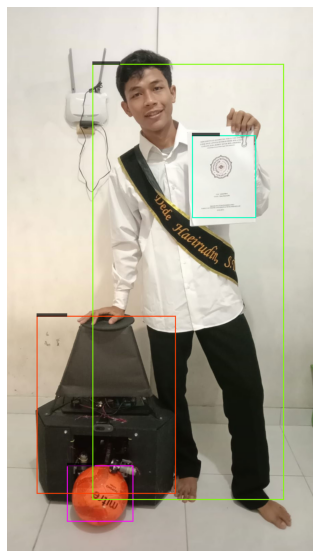

In [ ]:
!darknet/darknet detector test /content/drive/MyDrive/yolopost/costum_data/labelled_data.data /content/yolov3-tiny.cfg /content/drive/MyDrive/yolopost/backup/yolov3-tiny_last.weights /content/2.jpeg -thresh 0.3
imShow('predictions.jpg')